In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline



In [52]:
#games1 = pd.read_csv("games.csv", encoding = "ISO-8859-1", index_col=0) games 1 are all contained in the other DF
#games = pd.read_csv("gamesNoPoints.csv", encoding = "ISO-8859-1", index_col=0)


#These are all of the game data before dropping all things directly impacting the win
gamesPre = pd.read_csv("games2.csv", encoding = "ISO-8859-1", index_col=0)



/Users/jaybooth/Projects/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,7,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
#drop all duplicate columns
gamesPre.drop_duplicates()

,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,tournament_round,...,opp_fast_break_pts,opp_second_chance_pts,opp_team_turnovers,opp_points_off_turnovers,opp_team_rebounds,opp_flagrant_fouls,opp_player_tech_fouls,opp_team_tech_fouls,opp_coach_tech_fouls,created
game_id,,,,,,,,,,,,,,,,,,,,,
4069f80e-04f0-4f69-a563-86014bbe95a0,2015,closed,full,NaN,12/3/2015,2015-12-03 03:00:00 UTC,NaN,NaN,NaN,NaN,...,0.0,17.0,0.0,31.0,7.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC
7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51,2015,closed,full,NaN,1/17/2016,2016-01-17 02:00:00 UTC,NaN,NaN,NaN,NaN,...,21.0,16.0,1.0,30.0,3.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC
320ccf7a-8a32-4ce6-a561-10687985c6a6,2015,closed,full,NaN,12/22/2015,2015-12-22 20:00:00 UTC,NaN,NaN,NaN,NaN,...,26.0,16.0,0.0,36.0,4.0,0,0,0.0,0.0,2018-02-20 15:48:53 UTC
1a689aee-fec2-49df-822d-993e2826744b,2017,closed,full,False,12/10/2017,2017-12-10 00:00:00 UTC,False,NaN,NaN,NaN,...,8.0,21.0,0.0,16.0,0.0,0,0,0.0,0.0,2018-02-20 13:03:23 UTC
6314105c-8456-4b35-bfbf-1ec04749ff09,2017,closed,full,False,12/9/2017,2017-12-09 21:00:00 UTC,False,NaN,NaN,NaN,...,8.0,15.0,0.0,19.0,2.0,0,0,0.0,0.0,2018-02-20 13:03:24 UTC
8240dd38-a137-492d-9468-4f9b11ac4927,2016,closed,full,False,12/10/2016,2016-12-10 22:00:00 UTC,False,NaN,NaN,NaN,...,8.0,24.0,0.0,22.0,1.0,0,0,0.0,0.0,2018-02-20 16:40:00 UTC
6f5cd292-3a1a-4677-9c78-0549fbfc4b72,2016,closed,full,False,11/12/2016,2016-11-12 22:00:00 UTC,False,NaN,NaN,NaN,...,10.0,12.0,0.0,33.0,0.0,0,0,0.0,0.0,2018-02-20 16:40:00 UTC
7a006cde-d6a6-4529-afb5-525888f2dce8,2017,closed,full,False,2/14/2018,2018-02-14 01:00:00 UTC,False,NaN,NaN,NaN,...,16.0,9.0,0.0,24.0,2.0,0,0,0.0,0.0,2018-02-20 13:03:26 UTC
cc33cbca-af83-494e-9439-9e2eacb73a01,2015,closed,full,NaN,11/24/2015,2015-11-24 23:00:00 UTC,NaN,NaN,NaN,NaN,...,2.0,10.0,0.0,12.0,1.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC


In [54]:
#gamesPre

In [55]:
gamesPre.shape

(51265, 131)

# Preprocess

In [56]:
# Create new column called win. fill row with 1 if points_game > opp_points_game , 0 otherwise
gamesPre['WIN'] = np.where(gamesPre['points_game']>gamesPre['opp_points_game'],1,0)

In [57]:
#count_row = gamesPre.shape[0]
#count_col = gamesPre.shape[1]
#print(count_row)
#print(count_col)

In [58]:
#games = gamesPre.loc[:, gamesPre.columns != ['two_points_att','two_points_made','win','points','points_game','field_goals_att','three_points_made','three_points_att','free_throws_made','free_throws_att','opp_points','opp_points_game','opp_two_points_att','opp_two_points_made','opp_field_goals_att','opp_three_points_made','opp_three_points_att','opp_free_throws_made','opp_free_throws_att']]

In [59]:
#Drop columns directly related to wins
games = gamesPre.drop(['blocked_att','opp_blocked_att','season','periods','two_points_att','two_points_made','win','points','points_game','field_goals_att','field_goals_made','three_points_made','three_points_att','free_throws_made','free_throws_att','opp_points','opp_points_game','opp_two_points_att','opp_two_points_made','opp_field_goals_att','opp_field_goals_made','opp_three_points_made','opp_three_points_att','opp_free_throws_made','opp_free_throws_att'],1)

In [60]:
#Remove all non Numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

games = games.select_dtypes(include=numerics)

#NumGamesNoCor.to_csv('numOnlyGames.csv')

In [61]:
games.shape

(51265, 53)

In [62]:
#Make all percentages uniform
games.loc[games['field_goals_pct'] > 1, 'field_goals_pct'] *= .01
games.loc[games['three_points_pct'] > 1, 'three_points_pct'] *= .01
games.loc[games['two_points_pct'] > 1, 'two_points_pct'] *= .01
games.loc[games['free_throws_pct'] > 1, 'free_throws_pct'] *= .01
games.loc[games['opp_field_goals_pct'] > 1, 'opp_field_goals_pct'] *= .01
games.loc[games['opp_three_points_pct'] > 1, 'opp_three_points_pct'] *= .01
games.loc[games['opp_two_points_pct'] > 1, 'opp_two_points_pct'] *= .01
games.loc[games['opp_free_throws_pct'] > 1, 'opp_free_throws_pct'] *= .01


    #three_points_pct two_points_pct free_throws_pct


In [63]:
#games[games['free_throws_pct'] > 1]

In [64]:
count_row = games.shape[0]
count_col = games.shape[1]
#print(count_row)
#print(count_col)

In [65]:
#drop columns that have more than some% of NA's in them

somePcols = .05
countc =0
max_number_of_nas = somePcols*count_col
indexC = 0
listofbadcols=[]

for cols in games:
    if games[cols].isna().sum() > somePcols*count_row:
        print (cols)      
        countc = countc+1
        listofbadcols.extend([indexC])
    indexC = indexC+1
#games = games.loc[:, (games.isnull().sum(axis=0) <= max_number_of_nas)]        
games.drop(games.columns[listofbadcols],axis=1,inplace=True)


print (countc)

ejections
foulouts
fast_break_pts
team_tech_fouls
coach_tech_fouls
opp_ejections
opp_foulouts
opp_fast_break_pts
opp_team_tech_fouls
opp_coach_tech_fouls
10


In [66]:
#drop rows with any NA's in them
games.dropna(inplace=True)

In [67]:
#drop rows with any NA's in them
"""
nullSumsRows=games.isnull().sum(axis=1)
indexR=0

#rows where there are no NA's
sum0s=0

#rows with some NA's
listofbadrows=[]

for i in nullSumsRows:
    if nullSumsRows[indexR] ==0:
        sum0s=sum0s+1
    #if nullSumsRows[index] > .05*count_row:
        #print(i)
        #print(nullSumsRows[indexR])
    else:
        listofbadrows.extend([indexR])
    indexR=indexR+1  
games=games.drop(games.index[listofbadrows])
"""

"\nnullSumsRows=games.isnull().sum(axis=1)\nindexR=0\n\n#rows where there are no NA's\nsum0s=0\n\n#rows with some NA's\nlistofbadrows=[]\n\nfor i in nullSumsRows:\n    if nullSumsRows[indexR] ==0:\n        sum0s=sum0s+1\n    #if nullSumsRows[index] > .05*count_row:\n        #print(i)\n        #print(nullSumsRows[indexR])\n    else:\n        listofbadrows.extend([indexR])\n    indexR=indexR+1  \ngames=games.drop(games.index[listofbadrows])\n"

In [68]:
#len(listofbadrows)

In [69]:
#sum0s

In [70]:
games.shape

(45712, 43)

In [71]:
games.shape

(45712, 43)

In [72]:
#Normalize the data
#games=(games-games.min())/(games.max()-games.min())
gamesMin=(games.min())
gamesMax=(games.max())

In [73]:
#Create a touched up csv file up to this point
#games.to_csv('GamesTouchedUp.csv')

In [74]:
games.var()

attendance                    3.458492e+07
lead_changes                  1.901431e+01
times_tied                    1.098913e+01
venue_capacity                3.460230e+07
field_goals_pct               5.806022e-03
three_points_pct              1.298339e-02
two_points_pct                9.594540e-03
free_throws_pct               1.586366e-02
offensive_rebounds            1.391847e+01
defensive_rebounds            2.721763e+01
rebounds                      4.512074e+01
assists                       2.054203e+01
turnovers                     1.598712e+01
steals                        8.225504e+00
blocks                        5.303145e+00
assists_turnover_ratio        5.170300e-01
personal_fouls                2.069976e+01
second_chance_pts             2.867955e+01
team_turnovers                4.498384e-01
points_off_turnovers          3.908869e+01
team_rebounds                 4.191393e+00
flagrant_fouls                1.826154e-02
player_tech_fouls             1.617472e-01
opp_field_g

In [75]:
#Save all variances of each column
gvars=games.var()

# Why does running the variance line below more than once keep dropping more and more columns

In [76]:
#Drop columns with a variance smaller than .2
#nonvarientcols=np.where(games.var()<.001)
#print (games.columns[nonvarientcols])
#games.drop(games.columns[nonvarientcols],axis=1,inplace=True)

In [77]:
games.shape

(45712, 43)

In [78]:
#gvars.index[38]

In [79]:
#Func for checking for correlated features and remove them
def removeCorrelation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Column ',corr_matrix.columns[i],' is being removed because this cell has a value of ',corr_matrix.iloc[i, j])
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [80]:
#Create a second DF with no correlated info
GamesNoCor = removeCorrelation(games, .8)

Column  two_points_pct  is being removed because this cell has a value of  0.8385294633617953
Column  rebounds  is being removed because this cell has a value of  0.8335229264896633
Column  opp_two_points_pct  is being removed because this cell has a value of  0.8400314896642068
Column  opp_rebounds  is being removed because this cell has a value of  0.8346834208784314


In [81]:
GamesNoCor.to_csv('noCovGames.csv')

In [82]:
GamesNoCor.shape

(45712, 39)

In [83]:
#Split into labels and non
#X = GamesNoCor.loc[:, GamesNoCor.columns != 'WIN']
#y = GamesNoCor.loc[:, GamesNoCor.columns == 'WIN']

X = games.loc[:, games.columns != 'WIN']
y = games.loc[:, games.columns == 'WIN']

In [84]:
#X

In [85]:
#redo logistic regression
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.113716
         Iterations 10
                                Results: Logit
Model:                   Logit                No. Iterations:       10.0000   
Dependent Variable:      WIN                  Pseudo R-squared:     0.836     
Date:                    2019-04-11 16:48     AIC:                  10472.4017
No. Observations:        45712                BIC:                  10804.1461
Df Model:                37                   Log-Likelihood:       -5198.2   
Df Residuals:            45674                LL-Null:              -31685.   
Converged:               1.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------------
attendance                   0.0000   0.0000   0.0670 0.9466

In [86]:
for idx,pval in enumerate(result.pvalues):
    print(X.columns[idx],pval)
#    if pval == 0:
#        del X[X.columns[idx]]

attendance 0.9465700018141933
lead_changes 0.9890380931775934
times_tied 0.9902503708675003
venue_capacity 0.9415253029373329
field_goals_pct 0.0
three_points_pct 4.1261197027349364e-276
free_throws_pct 7.948131583999879e-240
offensive_rebounds 1.4609144687497367e-177
defensive_rebounds 4.972898565562663e-115
assists 4.116439337852768e-32
turnovers 2.535682125522385e-256
steals 0.00021062884640503957
blocks 1.86467113803675e-10
assists_turnover_ratio 0.41313005636264843
personal_fouls 0.0
second_chance_pts 4.8407965422234615e-09
team_turnovers 3.117248100643501e-28
points_off_turnovers 1.3092443564706484e-08
team_rebounds 1.2287164767639473e-86
flagrant_fouls 0.0010502614535635218
player_tech_fouls 0.001869798427895144
opp_field_goals_pct 0.0
opp_three_points_pct 2.2220013833979042e-276
opp_free_throws_pct 7.822764047609493e-240
opp_offensive_rebounds 2.007723872995617e-177
opp_defensive_rebounds 7.920573675070245e-115
opp_assists 4.86050695366765e-32
opp_turnovers 7.66978305280027e-25

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
y_pred = logreg.predict(X_test)
y_score = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94597


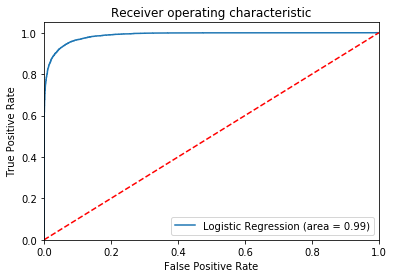

In [38]:
logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score) # gets false pos rate, true pr, and thresh
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[6444  438]
 [ 393 6439]]


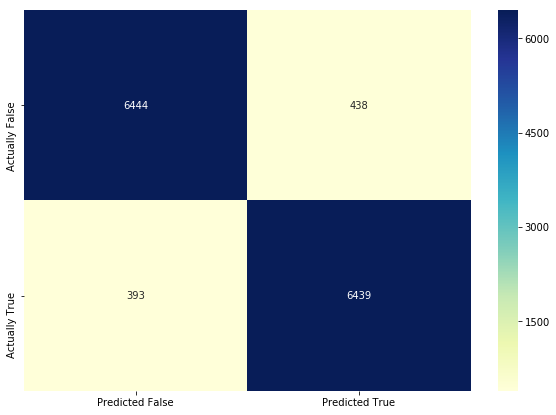

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
df_cm = pd.DataFrame(confusion_matrix, index = ["Actually False", "Actually True"],
                  columns = ["Predicted False", "Predicted True"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

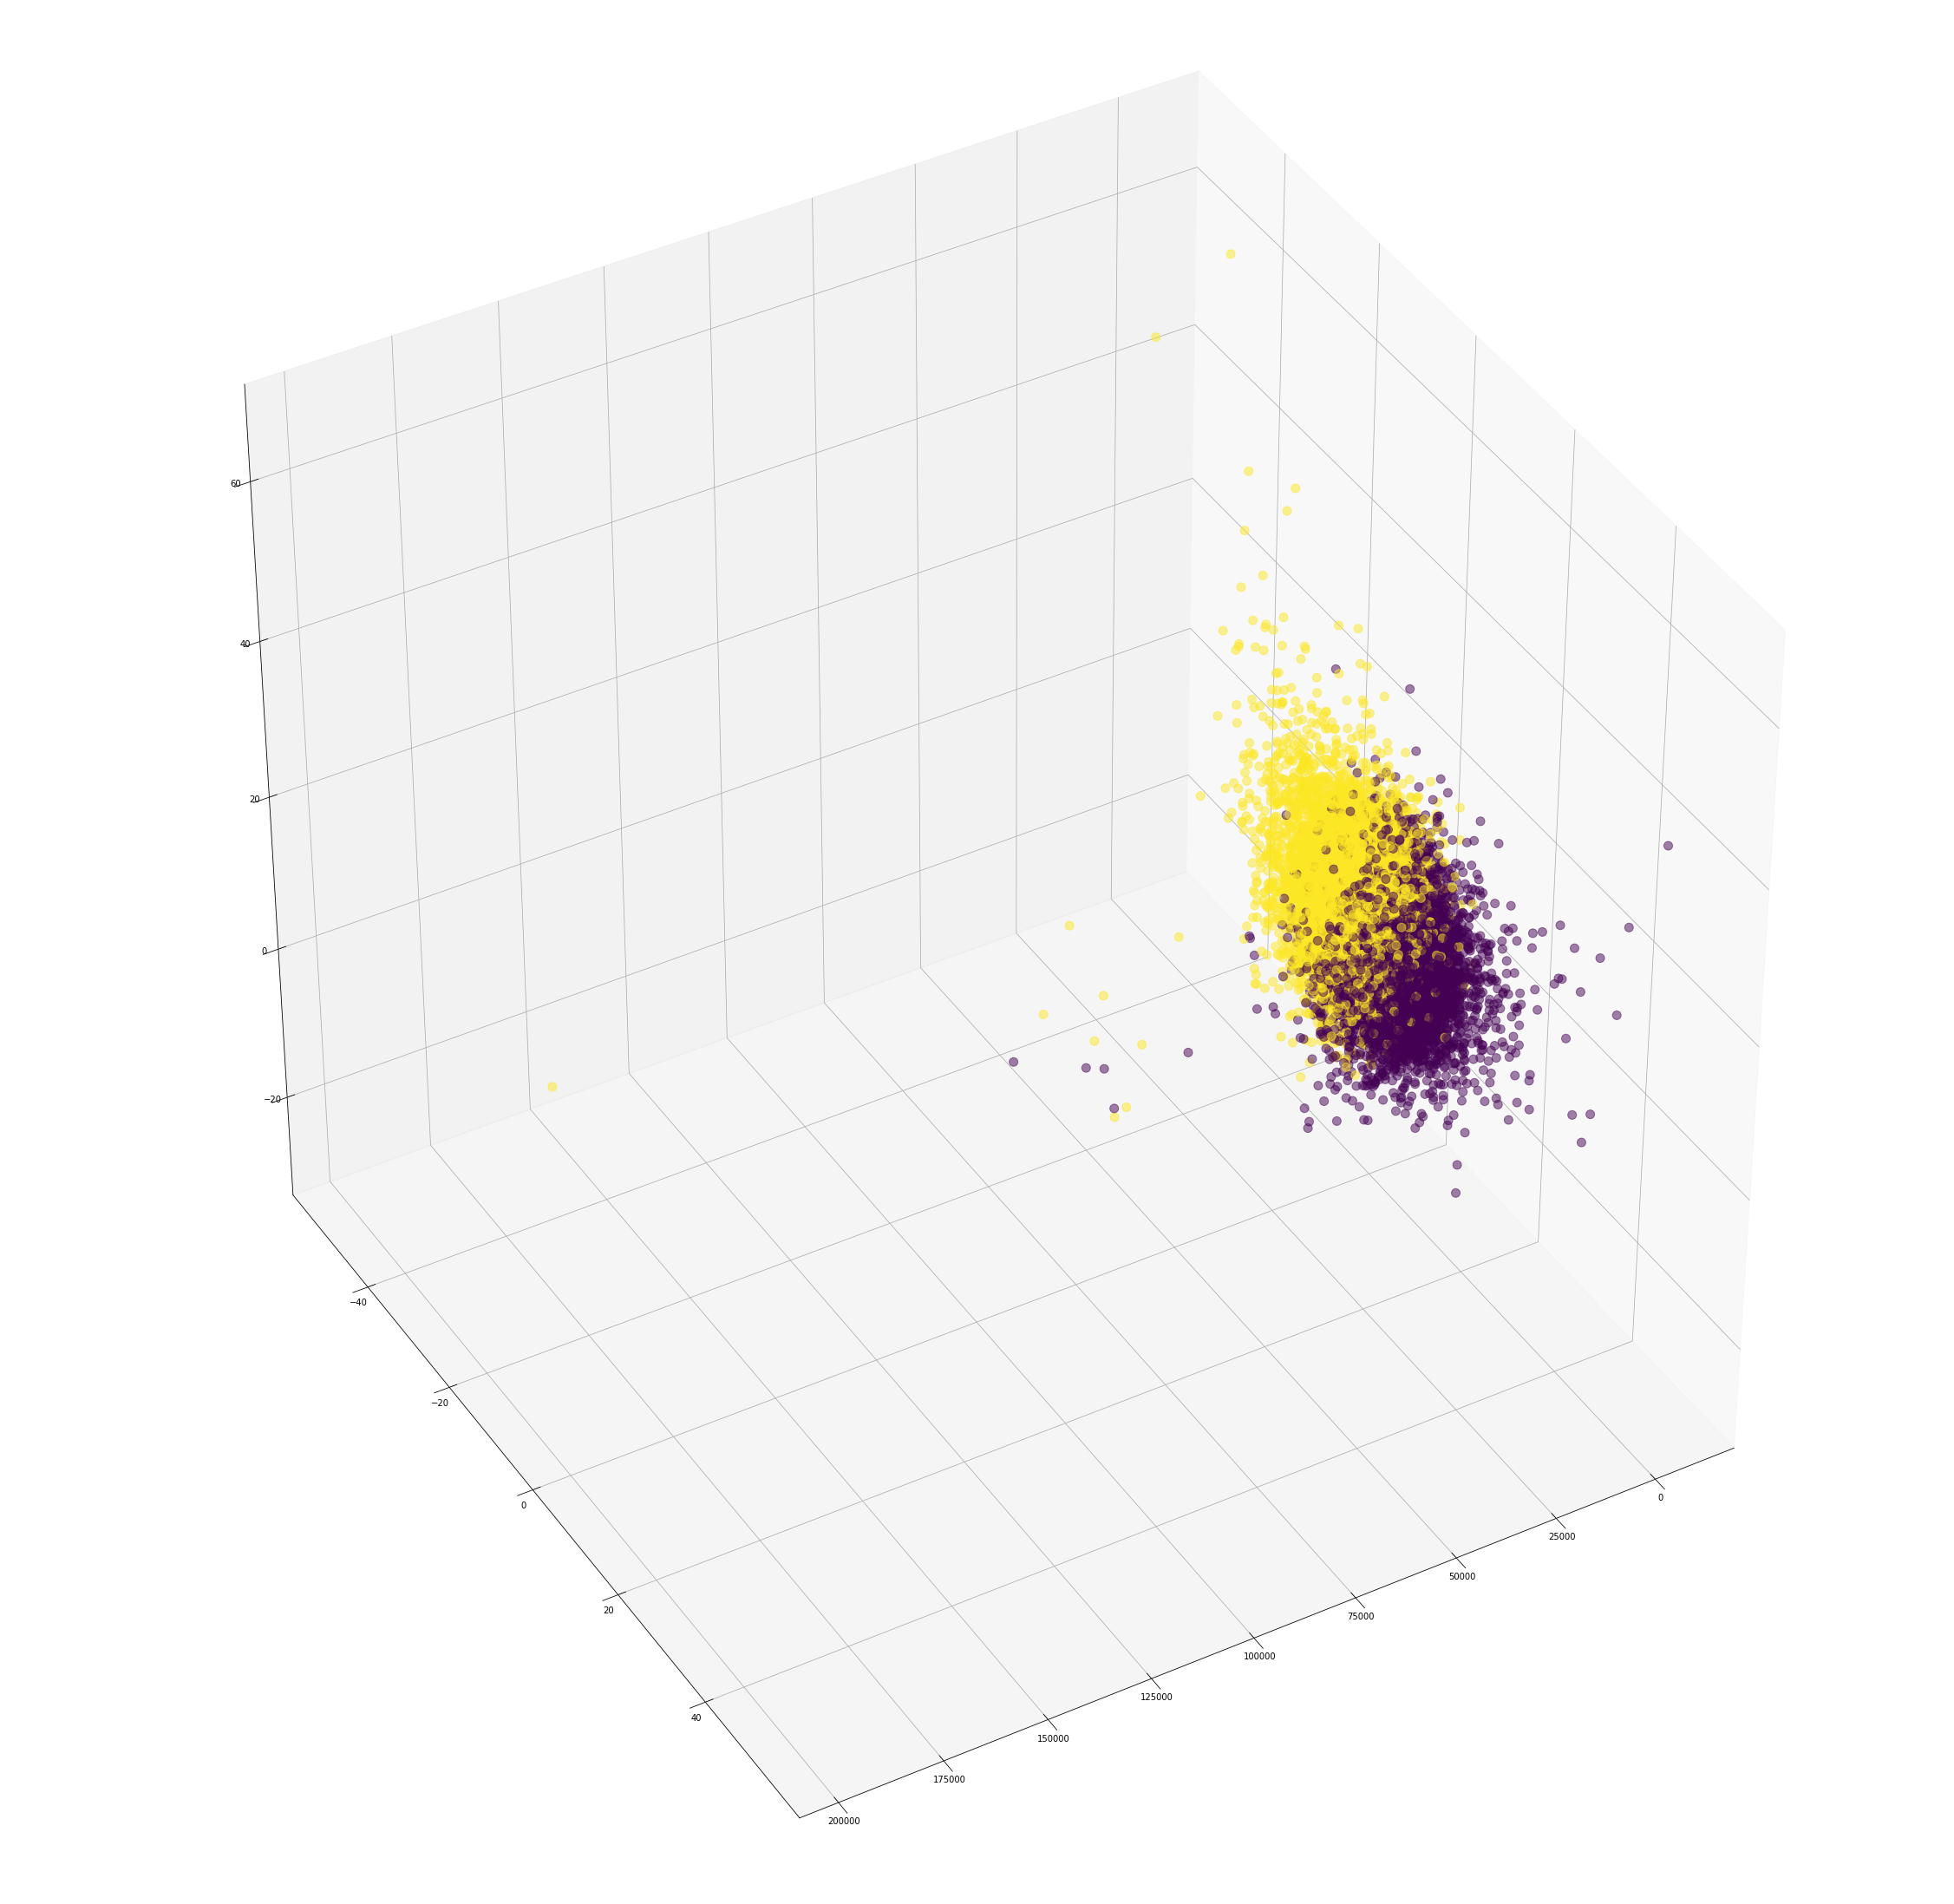

In [40]:
pca = PCA(n_components=3)
_3DPCA = pca.fit_transform(X_test)
kmeans = KMeans(n_clusters=2, random_state=0).fit(_3DPCA)


fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(_3DPCA[:,0], _3DPCA[:,1], _3DPCA[:,2], 
           s=100, c=y_test.values.ravel(), alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2],marker='X',s=10000)
ax.view_init(40, 60)
#rot_animation = animation.FuncAnimation(fig, animate, frames=np.arange(0,362,2),interval=100)
#rot_animation.save('rotation1.gif', dpi=80, writer='imagemagick')



In [ ]:
for game1 in games1.index:
        if game1 in games2.index:
            print (game1)
            game1sINgame2= game1sINgame2+1
        

In [ ]:
game1sINgame2